<a href="https://colab.research.google.com/github/RochX/comp486-assignments/blob/main/assignment4/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
## Xavier Silva

## Part 1

### Question 1
Use `read_csv` in `pandas` to read the CSV (`adm_data.csv`) file and assign it to a variable and print it.

In [1]:
from pathlib import Path
import pandas as pd
import urllib.request

# download the data if it is not downloaded
if not Path("adm_data.csv").is_file():
  # here I download the data from my personal git repo for this class instead of using Google Drive
  url = "https://raw.githubusercontent.com/RochX/comp486-assignments/main/assignment2/adm_data.csv"
  urllib.request.urlretrieve(url, "adm_data.csv")

In [2]:
adm_data=pd.read_csv('adm_data.csv')
adm_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### Question 2
Split the data into a training set and a test set.

In [3]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

adm_training_set, adm_test_set  = shuffle_and_split_data(adm_data, 0.15)
len(adm_training_set), len(adm_test_set)

(340, 60)

### Question 3
Using the training set, train a linear regression model to predict the chance of Admission to a university using `LinearRegression()` in Scikit-Learn, singular value
decomposition (SVD), Stochastic Gradient Descent, and Polynomial Regression with degree 2, then fill out the following table (show your full work). For each model:
1. What are the values of the model parameters ($\Theta$'s)?
2. Predict $\hat{y}$ for the new instance (`X_new`) where `X_new =[324, 112, 3, 2, 4.5, 8,1]`.
3. Calculate the score (using the test set).
4. Calculate the cost (`mean_squared_error`) (using the test set).
5. Write your observation about the results from the table.

*See the text cell with the table for all answers.*

In [5]:
# scale the training data
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0, 1)).set_output(transform="pandas")
label_scaler = MinMaxScaler(feature_range=(0, 1)).set_output(transform="pandas")

adm_training_features = feature_scaler.fit_transform(adm_training_set.drop(["Serial No.", "Chance of Admit "], axis=1))
adm_training_labels = label_scaler.fit_transform(adm_training_set[["Chance of Admit "]])

We use the same scaler on the test data.
Notice that the minimums are not consistently `0` and the maximums are not consistently `1`.
This tells us we didn't actually use the `fit_transform` function on the test set and thus has the same scaling as the training set.

In [6]:
# scale the test features
adm_test_features = feature_scaler.transform(adm_test_set.drop(["Serial No.", "Chance of Admit "], axis=1))
adm_test_features.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.545000,0.554167,0.554167,0.627083,0.620833,0.595833,0.583333
std,0.250684,0.225637,0.284082,0.234127,0.233533,0.211935,0.497167
min,0.120000,0.142857,0.250000,0.125000,0.125000,0.192308,0.000000
25%,0.360000,0.419643,0.250000,0.500000,0.500000,0.448718,0.000000
50%,0.580000,0.535714,0.500000,0.625000,0.625000,0.570513,1.000000
75%,0.700000,0.714286,0.750000,0.750000,0.750000,0.776442,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.967949,1.000000


In [7]:
# scale the test labels
adm_test_labels = label_scaler.transform(adm_test_set[["Chance of Admit "]])
adm_test_labels.describe()

,Chance of Admit
count,60.000000
mean,0.600000
std,0.269973
min,0.000000
25%,0.428571
50%,0.595238
75%,0.825397
max,0.984127


In [8]:
# set up the X_new variable with column names for each feature
X_new = [324, 112, 3, 2, 4.5, 8, 1]
X_new = pd.DataFrame([X_new], columns=list(adm_training_features))
X_new = feature_scaler.transform(X_new)
X_new

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.68,0.714286,0.5,0.25,0.875,0.384615,1.0


#### `LinearRegression()`
Train the model, get coefficients and intercept.

In [9]:
# LinearRegression()
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(adm_training_features, adm_training_labels)
lin_reg.intercept_,lin_reg.coef_

(array([0.03120841]),
 array([[0.14984229, 0.12218902, 0.0405335 , 0.00439134, 0.10905379,
         0.56415567, 0.03652352]]))

Predict the chance of admission for the new instance.

In [10]:
# note that we have to undo the scaling
# we add ".reshape(-1, 1)" since undoing the scaling requires it
label_scaler.inverse_transform(lin_reg.predict(X_new).reshape(-1, 1))

array([[0.71212346]])

Calculate the score using the test set.

In [11]:
lin_reg.score(adm_test_features, adm_test_labels)

0.8102830881910719

Calculate the mean squared error.

In [12]:
from sklearn.metrics import mean_squared_error

adm_test_predictions = lin_reg.predict(adm_test_features)

lin_reg_mse = mean_squared_error(adm_test_labels, adm_test_predictions)
lin_reg_mse

0.013597095674771404

#### Singular Value Decomposition

Train the model, get coefficients and intercept.

In [92]:
# Singular Value Decomposition
from sklearn.preprocessing import add_dummy_feature
adm_training_features_with_dummy = add_dummy_feature(adm_training_features)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(adm_training_features_with_dummy, adm_training_labels, rcond=1e-6)

svd_regression = LinearRegression()
svd_regression.intercept_ = theta_best_svd[0]
svd_regression.coef_ = np.ravel(theta_best_svd[1:])

theta_best_svd

array([[0.03120841],
       [0.14984229],
       [0.12218902],
       [0.0405335 ],
       [0.00439134],
       [0.10905379],
       [0.56415567],
       [0.03652352]])

Predict the chance of admission for the new instance.

In [14]:
X_new_with_dummy = add_dummy_feature(X_new)
label_scaler.inverse_transform(X_new_with_dummy @ theta_best_svd)

array([[0.71212346]])

In [93]:
svd_regression.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.59067216])

Calculate the score using the test set.

In [16]:
svd_regression.score(adm_test_features, adm_test_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8102830881910718

Calculate the mean squared error.

In [17]:
from sklearn.metrics import mean_squared_error

adm_test_predictions = svd_regression.predict(adm_test_features)

svd_reg_mse = mean_squared_error(adm_test_labels, adm_test_predictions)
svd_reg_mse

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.013597095674771416

#### Stochastic Gradient Descent

Train the model, get coefficients and intercept.

In [61]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(adm_training_features, np.ravel(adm_training_labels))

sgd_reg.intercept_, sgd_reg.coef_

(array([0.07799905]),
 array([0.20518317, 0.17828782, 0.08993212, 0.06162137, 0.11685651,
        0.2646796 , 0.03967091]))

Predict the chance of admission for the new instance.

In [19]:
# note that we have to undo the scaling
# we add ".reshape(-1, 1)" since undoing the scaling requires it
label_scaler.inverse_transform(sgd_reg.predict(X_new).reshape(-1, 1))

array([[0.7488471]])

Calculate the score using the test set.

In [20]:
sgd_reg.score(adm_test_features, adm_test_labels)

0.7818493134990467

Calculate the mean squared error.

In [21]:
from sklearn.metrics import mean_squared_error

adm_test_predictions = sgd_reg.predict(adm_test_features)

sgd_reg_mse = mean_squared_error(adm_test_labels, adm_test_predictions)
sgd_reg_mse

0.01563495698716583

#### Polynomial Regression with degree 2

Train the model, get coefficients and intercept.

In [22]:
# Polynomial Regression with degree 2
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

adm_training_features_poly = poly_features.fit_transform(adm_training_features)

poly_reg = LinearRegression()
poly_reg.fit(adm_training_features_poly, adm_training_labels)

poly_reg.intercept_, poly_reg.coef_

(array([0.02914502]),
 array([[ 0.2168003 ,  0.24854737, -0.16227261,  0.05727338,  0.14362016,
          0.59874864, -0.03495433,  0.02002601, -0.228508  ,  0.14116221,
          0.05204462,  0.23940147, -0.44481444,  0.00827988,  0.1311509 ,
         -0.04844039,  0.35528208, -0.20658764, -0.42156865,  0.07691971,
         -0.14763842,  0.60503182, -0.01408859, -0.02536459, -0.03105193,
         -0.54738908, -0.09102589,  0.29495698, -0.06570548,  0.34098534,
         -0.71475671, -0.0081984 ,  0.50845454,  0.20880843, -0.03495433]]))

Predict the chance of admission for the new instance.

In [23]:
# note that we have to undo the scaling
# we add ".reshape(-1, 1)" since undoing the scaling requires it
X_new_poly = poly_features.transform(X_new)
label_scaler.inverse_transform(poly_reg.predict(X_new_poly).reshape(-1, 1))

array([[0.7319162]])

Calculate the score using the test set.

In [24]:
# should I be using fit_transform or just transform?
adm_test_features_poly = poly_features.fit_transform(adm_test_features)
poly_reg.score(adm_test_features_poly, adm_test_labels)

0.8110556651788536

Calculate the mean squared error.

In [25]:
adm_test_predictions = poly_reg.predict(adm_test_features_poly)

poly_reg_mse = mean_squared_error(adm_test_labels, adm_test_predictions)
poly_reg_mse

0.013541724737521625

#### Table for question 3:
Note that $\theta_0$ is the intercept for all regressions.

All values for $\theta$ have been rounded to 3 decimal places.

| Model/Technique | Thetas $\Theta$'s | Predict `X_new` | Score | `mean_squared_error` |
| --- | --- | --- | --- | --- |
| Linear regression using Scikit-Learn | $\theta_0, \theta_1, \dots, \theta_7 = \{0.031, 0.150, 0.122, 0.041 , 0.004, 0.109, 0.564, 0.037\}$ | 0.71 | 0.81 | 0.0136 |
| Singular Value Decomposition (SVD) | $\theta_0, \theta_1, \dots, \theta_7 = 0.031, 0.150, 0.122, 0.041, 0.004, 0.109, 0.564, 0.037$ | 0.71 | 0.81 | 0.0136 |
| Stochastic Gradient Descent | $\theta_0, \theta_1, \dots, \theta_7 = \{0.078, 0.205, 0.178, 0.090, 0.062, 0.117, 0.265 , 0.040\}$ | 0.74 | 0.78 | 0.0156
| Polynomial Regression with degree 2 | $\theta_0, \theta_1, \dots = \theta_{35} = \{0.029, 0.217,  0.249, -0.162,  0.057,  0.144,  0.599, -0.035,  0.02, -0.229,  0.141,  0.052,  0.239, -0.445,  0.008,  0.131, -0.048, 0.355, -0.207, -0.422,  0.077, -0.148,  0.605, -0.014, -0.025, -0.031, -0.547, -0.091,  0.295, -0.066,  0.341, -0.715, -0.008, 0.508,  0.209, -0.035\}$ | 0.73 | 0.811 | 0.0135 |

In the table we can see that all models have a similar mean squared error and score.
We can also see that the `sklearn` `LinearRegression()` function and the singular value decomposition method gives the exact same coefficients.
This means that `LinearRegression()` uses SVD while computing the coefficients for the linear regression.

### Question 4
Which model would you adopt and why?

I would adopt the linear regression model because it gives a low mean squared error while also being a simple model compared to Stochastic Gradient Descent and Polynomial Regression.

### Question 5
Train a decision tree model with `max_depth=2`, then predict the chance of Admission of `X_new`

In [89]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(adm_training_features, np.ravel(adm_training_labels))

DecisionTreeRegressor(max_depth=2, random_state=42)

Predict chance of admission for `X_new`.

In [90]:
tree_reg.predict(X_new)

array([0.34985866])

Visualize the decision tree model.

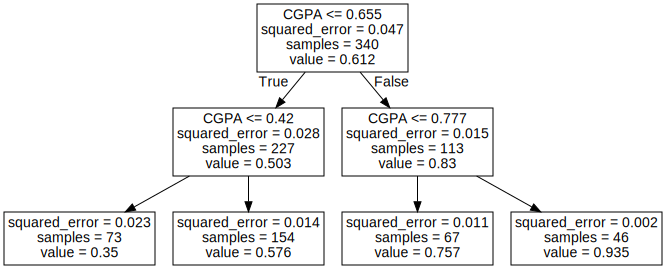

In [91]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(tree_reg, out_file='tree.dot', feature_names=adm_test_features.columns)
Source.from_file("tree.dot")

## Part 2

### Question 1
Download the rock-paper-scissors data.

In [27]:
from pathlib import Path
import pandas as pd
import urllib.request

# download the data if it is not downloaded
if not Path("rps-training-data.csv").is_file():
  # here I download the data from my personal git repo for this class instead of using Google Drive
  url = "https://raw.githubusercontent.com/RochX/comp486-assignments/main/assignment4/rps-training-data.csv"
  urllib.request.urlretrieve(url, "rps-training-data.csv")

# download the data if it is not downloaded
if not Path("rps-test-data.csv").is_file():
  # here I download the data from my personal git repo for this class instead of using Google Drive
  url = "https://raw.githubusercontent.com/RochX/comp486-assignments/main/assignment4/rps-test-data.csv"
  urllib.request.urlretrieve(url, "rps-test-data.csv")

Use `read_csv` in `pandas` to read the *training* set from the CSV ("Rock-Paper-
Scissor" training dataset) file and assign it to a variable and print it.

In [28]:
import pandas as pd

rps_training_data = pd.read_csv("rps-training-data.csv", header=None).rename(columns={2304: "RPS Label"})
rps_training_data

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
0,255,255,255,255,255,255,255,255,255,255,...,254,254,254,253,253,253,253,253,253,1
1,255,255,255,255,255,255,255,255,255,255,...,254,254,254,253,253,253,253,253,253,1
2,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,253,254,253,253,253,1
3,255,255,255,255,255,255,255,255,255,255,...,254,254,254,253,253,253,253,253,253,1
4,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,253,253,253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,253,253,253,253,253,253,253,253,253,253,...,246,246,246,247,248,248,248,249,249,3
2516,253,253,253,253,253,253,253,253,253,253,...,245,246,246,247,247,248,248,249,249,3
2517,253,253,253,253,253,253,253,253,253,253,...,246,246,246,247,247,248,248,249,249,3
2518,253,253,253,253,253,253,253,253,253,253,...,245,246,246,247,247,248,248,249,249,3


### Question 2
Use `read_csv` in `pandas` to read the *test* set from the CSV ("Rock-Paper-Scissor"
test dataset) file and assign it to a variable and print it.

In [29]:
rps_test_data = pd.read_csv("rps-test-data.csv", header=None).rename(columns={2304: "RPS Label"})
rps_test_data

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
0,253,253,253,253,253,253,253,253,253,252,...,254,247,249,249,249,250,250,250,251,1
1,253,253,253,253,253,253,253,253,253,253,...,254,247,249,249,250,250,250,250,251,1
2,253,253,253,253,253,253,253,253,253,253,...,254,247,249,249,249,250,250,250,250,1
3,253,253,253,253,253,253,253,253,253,252,...,254,247,249,249,249,250,250,250,251,1
4,253,253,253,253,253,253,253,253,253,253,...,254,247,249,249,249,250,250,250,251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,253,254,254,253,253,253,253,253,253,253,...,248,248,249,249,249,249,249,249,250,3
368,254,254,254,254,254,253,253,253,253,253,...,249,249,249,249,249,249,249,250,250,3
369,254,254,254,254,253,253,253,253,253,253,...,248,249,249,249,249,249,249,249,250,3
370,254,254,254,254,254,253,253,253,253,253,...,248,249,249,249,249,249,249,249,250,3


Shuffle the test and training data.

In [30]:
from sklearn.utils import shuffle

rps_training_data_shuffled = shuffle(rps_training_data, random_state=42)
rps_test_data_shuffled = shuffle(rps_test_data, random_state=42)

Now we perform feature scaling on the training and test data, as well as split the data into features and labels.

In [31]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler(feature_range=(0, 1)).set_output(transform="pandas")

rps_training_features = feature_scaler.fit_transform(rps_training_data_shuffled.drop("RPS Label", axis=1))
rps_training_labels = rps_training_data_shuffled[["RPS Label"]]

rps_test_features = feature_scaler.transform(rps_test_data_shuffled.drop("RPS Label", axis=1))
rps_test_labels = rps_test_data_shuffled[["RPS Label"]]

### Question 3
Train a binary classifier to distinguish between just two classes, paper, and non-paper
using `LogisticRegression`, `LinearSVC (C = 0.01)`, and `LinearSVC (C = 100)`. For each model:
1. Predict $\hat{y}$ for some new instances (`X_new`) where (`X_new = Xtrain[88], Xtrain[2159], Xtrain[1346]`).
2. Find the probability that the model used to predict the class of an instance (if applicable).
3. Calculate the score (using the test set)
4. What are the `decision_function` values?
5. Write your observation about the results from the table.

In [32]:
# set up X_new
X_new_features = rps_training_features.iloc[[88, 2159, 1346],:]
X_new_labels = rps_training_labels.iloc[[88, 2159, 1346],:]

#### `LogisticRegression`

Train the model.

In [33]:
import numpy as np
np.set_printoptions(suppress=True) # prevent numpy from printing in scientific notation
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(rps_training_features, np.ravel(rps_training_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Find the probability that the model used to predict the class of an instance.

In [34]:
log_reg.predict_proba(X_new_features)

array([[0.        , 0.        , 1.        ],
       [0.00004538, 0.9999345 , 0.00002012],
       [0.00066955, 0.99932879, 0.00000165]])

Predict labels for `X_new`.

In [35]:
log_reg.predict(X_new_features)

array([3, 2, 2])

Score the logistic regression model.

In [36]:
log_reg.score(rps_test_features, rps_test_labels)

0.6263440860215054

Get values of the `decision_function` for `X_new`.

In [37]:
log_reg.decision_function(X_new_features)

array([[-7.71757453, -8.10316692, 15.82074145],
       [-3.06241583,  6.93806512, -3.87564928],
       [-0.4349236 ,  6.8733036 , -6.43838   ]])

#### `LinearSVC (C = 0.01)`

Train the model.

In [38]:
from sklearn.svm import LinearSVC

linear_svc_low_regularization = LinearSVC(C = 0.01, random_state=42)
linear_svc_low_regularization.fit(rps_training_features, np.ravel(rps_training_labels))

LinearSVC(C=0.01, random_state=42)

Predict labels for `X_new`.

In [39]:
linear_svc_low_regularization.predict(X_new_features)

array([3, 2, 2])

Score the linear support vector classification model.

In [40]:
linear_svc_low_regularization.score(rps_test_features, rps_test_labels)

0.6129032258064516

Get values of the `decision_function` for `X_new`.

In [41]:
linear_svc_low_regularization.decision_function(X_new_features)

array([[-2.397946  , -1.95982507,  2.84083667],
       [-1.7188138 ,  1.36655853, -1.24012195],
       [-0.91922112,  1.37392168, -1.69920421]])

#### `LinearSVC (C = 100)`

Train the model.

In [42]:
from sklearn.svm import LinearSVC

# increase number of iterations since sklearn gives us a ConvergenceWarning
linear_svc_high_regularization = LinearSVC(C = 100, random_state=42, max_iter=2000)
linear_svc_high_regularization.fit(rps_training_features, np.ravel(rps_training_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, max_iter=2000, random_state=42)

Predict labels for `X_new`.

In [43]:
linear_svc_high_regularization.predict(X_new_features)

array([3, 2, 2])

Score the linear support vector classification model.

In [44]:
linear_svc_high_regularization.score(rps_test_features, rps_test_labels)

0.6155913978494624

Get values of the `decision_function` for `X_new`.

In [45]:
linear_svc_high_regularization.decision_function(X_new_features)

array([[-2.62521263, -2.55984826,  3.45531274],
       [-2.46507345,  1.63735508, -1.52298551],
       [-1.03271914,  1.71322518, -1.92220106]])

#### Table for question 3:

| Model/Technique | Predict `X_new` | Probability | `decision_function` | Score
| --- | --- | --- | --- | --- |
| `LogisticRegression` | [3, 2, 2] | [0, 0, 1], [0.00004499, 0.9999288 , 0.00002621], [0.00069741, 0.99930044, 0.00000215] | [-7.715, -7.967, 15.682], [-3.15621806,  6.853, -3.697], [-0.495,  6.772, -6.277] | 0.626
| `LinearSVC (C = 0.01)` | [3, 2, 2] | N/A | [-2.398, -1.960, 2.841], [-1.719, 1.367, -1.240], [-0.919, 1.374, -1.699] | 0.613
| `LinearSVC (C = 100)` | [3, 2, 2] | N/A | [-2.616, -2.588, 3.446], [-2.444,  1.655, -1.514], [-1.031, 1.721, -1.930] | 0.616

We can that all models predict the rock paper scissors in `X_new` correctly.
This is to be expected since `X_new` is a subset of the data used to train the model.
Logistic regression appears to perform slightly better than either linear SVM classifier model.

### Question 4
How can you predict the class of an instance using:
1. Probability (if applicable)
> When using probability to predict the class of an instance, the model gives a probability for each class.
  This tells us the likelihood that the given instance is a member of the a class.

2. `decision_function`
> When using the `decision_function`, the model gives a score to each category.
  The model then predicts the class of the instance by selecting the category with the highest score.

## Part 3


### Question 1
Use the same data (Rock-Paper-Scissor” dataset) in part 2 (training data and test data) to train multiclass classifiers using Softmax Regression, Polynomial Kernel SVM (degree=10, coef0=1, C=5), and Polynomial Kernel SVM with your suggested values.
For each model:
1. Predict $\hat{y}$ for some new instances (`X_new`) where (`X_new = Xtrain[88], Xtrain[2159], Xtrain[1346]`).
2. Find the probability that the model used to predict the class of an instance (if applicable).
3. Calculate the score (using the test set)
4. What are the `decision_function` values?
5. Write your observation about the results from the table.

In [46]:
# set up X_new
X_new_features = rps_training_features.iloc[[88, 2159, 1346],:]
X_new_labels = rps_training_labels.iloc[[88, 2159, 1346],:]

#### Softmax Regression

In [47]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(random_state=42)
softmax_reg.fit(rps_training_features, np.ravel(rps_training_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Find the probability that the model used to predict the class of an instance.

In [48]:
softmax_reg.predict_proba(X_new_features)

array([[0.        , 0.        , 1.        ],
       [0.00004538, 0.9999345 , 0.00002012],
       [0.00066955, 0.99932879, 0.00000165]])

Predict labels for `X_new`.

In [49]:
softmax_reg.predict(X_new_features)

array([3, 2, 2])

Score the logistic regression model.

In [50]:
softmax_reg.score(rps_test_features, rps_test_labels)

0.6263440860215054

Get values of the `decision_function` for `X_new`.

In [51]:
softmax_reg.decision_function(X_new_features)

array([[-7.71757453, -8.10316692, 15.82074145],
       [-3.06241583,  6.93806512, -3.87564928],
       [-0.4349236 ,  6.8733036 , -6.43838   ]])

#### Polynomial Kernel SVM with `degree=10, coef0=1, C=5`

In [52]:
from sklearn.svm import SVC
poly_kernel_svm = SVC(kernel="poly", degree=10, coef0=1, C=5)
poly_kernel_svm.fit(rps_training_features, np.ravel(rps_training_labels))

SVC(C=5, coef0=1, degree=10, kernel='poly')

Predict `X_new`.

In [53]:
poly_kernel_svm.predict(X_new_features)

array([3, 2, 2])

Score the model.

In [54]:
poly_kernel_svm.score(rps_test_features, rps_test_labels)

0.6774193548387096

Get the `decision_function` values for `X_new`.

In [55]:
poly_kernel_svm.decision_function(X_new_features).round(3)

array([[ 0.868, -0.221,  2.241],
       [-0.227,  2.24 ,  0.896],
       [ 0.896,  2.232, -0.216]])

#### Polynomial Kernel SVM with suggested values.

Train a polynomial kernel SVM with the default values given by `sklearn`.

In [94]:
from sklearn.svm import SVC
poly_kernel_svm_default = SVC(kernel="poly")
poly_kernel_svm_default.fit(rps_training_features, np.ravel(rps_training_labels))
poly_kernel_svm_default.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Predict `X_new`.

In [57]:
poly_kernel_svm_default.predict(X_new_features)

array([3, 2, 2])

Score the model.

In [58]:
poly_kernel_svm_default.score(rps_test_features, rps_test_labels)

0.6586021505376344

Get the `decision_function` values for `X_new`.

In [59]:
poly_kernel_svm_default.decision_function(X_new_features).round(3)

array([[ 0.82 , -0.236,  2.261],
       [-0.248,  2.25 ,  0.971],
       [ 0.854,  2.233, -0.202]])

#### Table for question 1:

| Model/Technique | Predict `X_new` | Probability | `decision_function` | Score
| --- | --- | --- | --- | --- |
| `Softmax Regression` | [3, 2, 2] | [0, 0, 1], [0.00004499, 0.9999288 , 0.00002621], [0.00069741, 0.99930044, 0.00000215] | [-7.715, -7.967, 15.682], [-3.15621806,  6.853, -3.697], [-0.495,  6.772, -6.277] | 0.626 |
| `Polynomial Kernel SVM (degree=10, ceof0=1, C=5)` | [3, 2, 2] | N/A | [0.868, -0.221,  2.241], [-0.227,  2.24, 0.896], [0.896, 2.232, -0.216] | 0.677 |
| `Polynomial Kernel SVM` with `sklearn` default values | [3, 2, 2] | N/A | [0.82, -0.236, 2.261], [-0.248, 2.25, 0.971], [0.854,  2.233, -0.202] | 0.659

We can that all models predict the rock paper scissors in `X_new` correctly.
This is to be expected since `X_new` is a subset of the data used to train the model.
We see that the polynomial kernel SVM performs better than the softmax regression.
Notably the hyperparameters we set for the polynomial kernel SVM had a better performance than the default hyperparameters given by `sklearn`.

### Question 2
Train a grid search model to find the best combination to train SVM classifiers between `C` and `gamma` with `kernel = rbf` as follows:
```
para_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}
```
1. What are the best values for the hyperparameters?
2. What is the best score?

In [95]:
para_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(random_state=42), para_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(rps_training_features, np.ravel(rps_training_labels))

grid_search.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 